# Part 2 - Predictive Model Development

## Section 1: Data Generation

In this section, we will perform classification on the simulated patients data using various machine learning models. We will also look into NLP tasks such as sentiment analysis, classification, and clinical text interpretation using specialized language models (SLMs).

## Assignment Details
- Author: Khor Kean Teng
- Date: May 23, 2025
- Model: Gemini 2.5 Flash Preview-0520

## Deliverables
- Construct and evaluate predictive models, including traditional models (Random Forest, XGBoost, Neural Networks) and advanced Transformer-based models. 
- Use SLMs for specialized NLP tasks like sentiment analysis, clinical text interpretation, and classification of questionnaire responses. 

## 2.1 Data Preparation

In [55]:
# import libraries
import pandas as pd

# read the CSV file
df = pd.read_csv('data/processed/patients_with_ratings.csv')

# preview the data
display(df.head())

,patient_id,age,gender,medical_history,deterioration_label,timestamp,hear_rate,blood_pressure_sys,blood_pressure_dia,oxygen_saturation,...,has_cancer,has_heart attack,has_heart failure,has_copd,has_asthma,has_alzheimer,has_dementia,fatigue_level,activity_level,mental_health_level
0,9b04b,65,Male,History of hypertension and type 2 diabetes.,True,2023-10-27T10:00:00Z,95.5,160.2,98.7,90.3,...,0,0,0,0,0,0,0,5,1,1
1,bffd5,45,Female,No significant medical history.,False,2023-10-27T10:05:00Z,70.2,120.5,75.0,98.5,...,0,0,0,0,0,0,0,2,4,4
2,fb35e,78,Male,"Chronic obstructive pulmonary disease (COPD), ...",True,2023-10-27T10:10:00Z,105.0,150.0,90.0,88.0,...,0,1,0,1,0,0,0,5,2,1
3,1e30e,30,Female,Mild asthma.,False,2023-10-27T10:15:00Z,65.0,110.0,70.0,99.0,...,0,0,0,0,1,0,0,1,5,4
4,116a4,55,Male,High cholesterol.,False,2023-10-27T10:20:00Z,75.5,135.0,85.0,97.0,...,0,0,0,0,0,0,0,3,3,3


In [56]:
# exclude column
exclude_columns = ['patient_id', 'timestamp', 'medical_history', 'describe_fatigue_level', 'describe_lifestyle', 'describe_mental_health', 'extracted_diseases']

# prepare the data
df = df.drop(columns=exclude_columns)

# preview the data
display(df.head())

,age,gender,deterioration_label,hear_rate,blood_pressure_sys,blood_pressure_dia,oxygen_saturation,temperature,respiratory_rate,has_stroke,...,has_cancer,has_heart attack,has_heart failure,has_copd,has_asthma,has_alzheimer,has_dementia,fatigue_level,activity_level,mental_health_level
0,65,Male,True,95.5,160.2,98.7,90.3,38.5,22.1,0,...,0,0,0,0,0,0,0,5,1,1
1,45,Female,False,70.2,120.5,75.0,98.5,36.8,16.0,0,...,0,0,0,0,0,0,0,2,4,4
2,78,Male,True,105.0,150.0,90.0,88.0,37.9,25.5,0,...,0,1,0,1,0,0,0,5,2,1
3,30,Female,False,65.0,110.0,70.0,99.0,36.5,14.0,0,...,0,0,0,0,1,0,0,1,5,4
4,55,Male,False,75.5,135.0,85.0,97.0,37.0,17.0,0,...,0,0,0,0,0,0,0,3,3,3


We have removed unwanted columns and rows from the dataset. The data is now clean and ready for analysis. 

In [57]:
# Convert gender (categorical) and deterioration_label (boolean) to numerical
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
le = LabelEncoder()

# Convert gender (object type) to numerical
df['gender'] = le.fit_transform(df['gender'])
print(f"Gender mapping: {dict(zip(le.classes_, range(len(le.classes_))))}")

# Convert deterioration_label (boolean) to integer (0/1)
df['deterioration_label'] = df['deterioration_label'].astype(int)

# Verify the conversions
print("\nUpdated data types:")
print(df.dtypes)

# Preview the transformed data
display(df.head())

Gender mapping: {'Female': 0, 'Male': 1, 'Other': 2}

Updated data types:
age                      int64
gender                   int32
deterioration_label      int32
hear_rate              float64
blood_pressure_sys     float64
blood_pressure_dia     float64
oxygen_saturation      float64
temperature            float64
respiratory_rate       float64
has_stroke               int64
has_diabetes             int64
has_hypertension         int64
has_cancer               int64
has_heart attack         int64
has_heart failure        int64
has_copd                 int64
has_asthma               int64
has_alzheimer            int64
has_dementia             int64
fatigue_level            int64
activity_level           int64
mental_health_level      int64
dtype: object


,age,gender,deterioration_label,hear_rate,blood_pressure_sys,blood_pressure_dia,oxygen_saturation,temperature,respiratory_rate,has_stroke,...,has_cancer,has_heart attack,has_heart failure,has_copd,has_asthma,has_alzheimer,has_dementia,fatigue_level,activity_level,mental_health_level
0,65,1,1,95.5,160.2,98.7,90.3,38.5,22.1,0,...,0,0,0,0,0,0,0,5,1,1
1,45,0,0,70.2,120.5,75.0,98.5,36.8,16.0,0,...,0,0,0,0,0,0,0,2,4,4
2,78,1,1,105.0,150.0,90.0,88.0,37.9,25.5,0,...,0,1,0,1,0,0,0,5,2,1
3,30,0,0,65.0,110.0,70.0,99.0,36.5,14.0,0,...,0,0,0,0,1,0,0,1,5,4
4,55,1,0,75.5,135.0,85.0,97.0,37.0,17.0,0,...,0,0,0,0,0,0,0,3,3,3


In [58]:
# check the data types
df.dtypes

age                      int64
gender                   int32
deterioration_label      int32
hear_rate              float64
blood_pressure_sys     float64
blood_pressure_dia     float64
oxygen_saturation      float64
temperature            float64
respiratory_rate       float64
has_stroke               int64
has_diabetes             int64
has_hypertension         int64
has_cancer               int64
has_heart attack         int64
has_heart failure        int64
has_copd                 int64
has_asthma               int64
has_alzheimer            int64
has_dementia             int64
fatigue_level            int64
activity_level           int64
mental_health_level      int64
dtype: object

In [59]:
# check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

We also check the data types to make sure they are appropriate for the analysis. 

## 3.2 Model Development - Classification

In the machine learning stage, we will perform classification one the `deterioration_label` column. We will make use of Random Forest, XGBoost and Neural Networks model from the `sklearn` and `xgboost` libraries. Furthermore, we also explore the use of transformer-based model for classification tasks. In particular, we make use of `TabTransformer` model which proposed the application of attention mechanism to tabular data.

### 3.2.1 Training and Testing Data

We will split the data into training and testing sets. The training set will be used to train the models, while the testing set will be used to evaluate their performance. 

In [60]:
# train test split
from sklearn.model_selection import train_test_split

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['deterioration_label']), df['deterioration_label'], test_size=0.3, random_state=42)

# check the shape of the data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (842, 21)
X_test shape: (361, 21)


### 3.2.2 Traditional Models

We will start with setting up traditional machine learning models such as Random Forest, XGBoost, and Neural Networks.

In [61]:
# Import necessary libraries for modeling
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pickle
import os

# Create directory for model storage if it doesn't exist
os.makedirs('models', exist_ok=True)

# Dictionary to store model results for later evaluation
model_results = {}


In [62]:
# ---- Random Forest ----
print("Training Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_train_preds = rf_model.predict(X_train)
rf_test_preds = rf_model.predict(X_test)
rf_test_proba = rf_model.predict_proba(X_test)[:, 1]

# Store results
model_results['random_forest'] = {
    'train_preds': rf_train_preds,
    'test_preds': rf_test_preds,
    'test_proba': rf_test_proba
}

# Save the model
with open('models/random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

print("Random Forest model trained and saved!")


Training Random Forest model...
Random Forest model trained and saved!


In [63]:
# ---- XGBoost ----
print("Training XGBoost model...")
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_train_preds = xgb_model.predict(X_train)
xgb_test_preds = xgb_model.predict(X_test)
xgb_test_proba = xgb_model.predict_proba(X_test)[:, 1]

# Store results
model_results['xgboost'] = {
    'train_preds': xgb_train_preds,
    'test_preds': xgb_test_preds,
    'test_proba': xgb_test_proba
}

# Save the model
with open('models/xgboost_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

print("XGBoost model trained and saved!")


Training XGBoost model...
XGBoost model trained and saved!


In [64]:
# ---- Neural Network ----
print("Training Neural Network model...")

# Scale features for neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train the neural network
nn_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),  # Two hidden layers
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='adaptive',
    max_iter=200,
    random_state=42
)
nn_model.fit(X_train_scaled, y_train)

# Make predictions
nn_train_preds = nn_model.predict(X_train_scaled)
nn_test_preds = nn_model.predict(X_test_scaled)
nn_test_proba = nn_model.predict_proba(X_test_scaled)[:, 1]

# Store results
model_results['neural_network'] = {
    'train_preds': nn_train_preds,
    'test_preds': nn_test_preds,
    'test_proba': nn_test_proba,
    'scaler': scaler  # Save the scaler for future predictions
}

# Save the model and scaler
with open('models/neural_network_model.pkl', 'wb') as f:
    pickle.dump({
        'model': nn_model,
        'scaler': scaler
    }, f)

print("Neural Network model trained and saved!")

Training Neural Network model...
Neural Network model trained and saved!


In [65]:
# Save all model results for later evaluation
with open('models/model_results.pkl', 'wb') as f:
    pickle.dump(model_results, f)

print("All models trained and results saved for evaluation!")

All models trained and results saved for evaluation!


### 3.2.3 Transformer-based Models

In [66]:
# ---- TabTransformer Implementation ----
import torch
import numpy as np
import pandas as pd
from tab_transformer_pytorch import FTTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# For reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

# Prepare categorical data (if any)
categorical_dims = {}
for col in categorical_cols:
    X_train[col] = X_train[col].astype('category')
    categorical_dims[col] = len(X_train[col].cat.categories)

# Get categories for FTTransformer
if len(categorical_cols) > 0:
    categories = tuple([categorical_dims[col] for col in categorical_cols])
else:
    categories = tuple()  # Empty if no categorical columns

# Scale numerical features
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numerical_cols].values)
X_test_num = scaler.transform(X_test[numerical_cols].values)

# Convert data to PyTorch tensors
if len(categorical_cols) > 0:
    X_train_cat = torch.tensor(X_train[categorical_cols].values, dtype=torch.long)
    X_test_cat = torch.tensor(X_test[categorical_cols].values, dtype=torch.long)
else:
    X_train_cat = torch.zeros((X_train.shape[0], 0), dtype=torch.long)
    X_test_cat = torch.zeros((X_test.shape[0], 0), dtype=torch.long)
    
X_train_num = torch.tensor(X_train_num, dtype=torch.float)
X_test_num = torch.tensor(X_test_num, dtype=torch.float)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float).reshape(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float).reshape(-1, 1)

# Define FTTransformer model
model = FTTransformer(
    categories=categories,            # categories tuple from above
    num_continuous=len(numerical_cols),  # number of numerical columns
    dim=32,                           # embedding dimension
    dim_out=1,                        # binary classification (0 or 1)
    depth=6,                          # transformer layers
    heads=8,                          # attention heads
    attn_dropout=0.1,                 # dropout rate
    ff_dropout=0.1                    # feed forward dropout
)

# Define loss function and optimizer
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
batch_size = 64
epochs = 10
n_samples = X_train_num.shape[0]
n_batches = n_samples // batch_size + (1 if n_samples % batch_size != 0 else 0)

print("Training FT Transformer model...")
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    
    # Create batches
    indices = torch.randperm(n_samples)
    
    for i in range(n_batches):
        # Get batch indices
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, n_samples)
        batch_indices = indices[start_idx:end_idx]
        
        # Get batch data
        if len(categorical_cols) > 0:
            X_cat_batch = X_train_cat[batch_indices]
        else:
            X_cat_batch = X_train_cat  # Empty tensor
            
        X_num_batch = X_train_num[batch_indices]
        y_batch = y_train_tensor[batch_indices]
        
        # Forward pass
        optimizer.zero_grad()
        outputs = model(X_cat_batch, X_num_batch)
        loss = loss_fn(outputs, y_batch)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    # Print epoch statistics
    if (epoch + 1) % 2 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/n_batches:.4f}")

print("FT Transformer model training complete!")

Categorical columns: []
Numerical columns: ['age', 'hear_rate', 'blood_pressure_sys', 'blood_pressure_dia', 'oxygen_saturation', 'temperature', 'respiratory_rate', 'has_stroke', 'has_diabetes', 'has_hypertension', 'has_cancer', 'has_heart attack', 'has_heart failure', 'has_copd', 'has_asthma', 'has_alzheimer', 'has_dementia', 'fatigue_level', 'activity_level', 'mental_health_level']
Training FT Transformer model...
Epoch 2/10, Loss: 0.1741
Epoch 4/10, Loss: 0.0989
Epoch 6/10, Loss: 0.0687
Epoch 8/10, Loss: 0.0528
Epoch 10/10, Loss: 0.0394
FT Transformer model training complete!


In [67]:
# Evaluation
model.eval()
with torch.no_grad():
    y_pred_proba = torch.sigmoid(model(X_test_cat, X_test_num)).numpy()
    y_pred = (y_pred_proba >= 0.5).astype(int)

# Store results
model_results['ft_transformer'] = {
    'test_preds': y_pred.flatten(),
    'test_proba': y_pred_proba.flatten()
}

# Save the model and additional info
model_save = {
    'model': model.state_dict(),
    'num_scaler': scaler,
    'categorical_cols': categorical_cols,
    'numerical_cols': numerical_cols
}

with open('models/ft_transformer_model.pkl', 'wb') as f:
    pickle.dump(model_save, f)

# Update all model results
with open('models/model_results.pkl', 'wb') as f:
    pickle.dump(model_results, f)

print("FT Transformer model evaluated and saved!")

FT Transformer model evaluated and saved!


In [68]:
# Calculate evaluation metrics
print("Calculating evaluation metrics...")
ft_accuracy = accuracy_score(y_test, y_pred.flatten())
ft_precision = precision_score(y_test, y_pred.flatten(), zero_division=0)
ft_recall = recall_score(y_test, y_pred.flatten(), zero_division=0)
ft_f1 = f1_score(y_test, y_pred.flatten(), zero_division=0)
ft_auc = roc_auc_score(y_test, y_pred_proba.flatten())

print(f"FT Transformer Metrics:")
print(f"Accuracy: {ft_accuracy:.4f}")
print(f"Precision: {ft_precision:.4f}")
print(f"Recall: {ft_recall:.4f}")
print(f"F1 Score: {ft_f1:.4f}")
print(f"AUC-ROC: {ft_auc:.4f}")

Calculating evaluation metrics...
FT Transformer Metrics:
Accuracy: 0.9889
Precision: 0.9827
Recall: 0.9942
F1 Score: 0.9884
AUC-ROC: 0.9999


,accuracy,precision,recall,f1,auc
random_forest,0.994460,0.994152,0.994152,0.994152,0.999831
xgboost,0.988920,0.988304,0.988304,0.988304,0.998923
neural_network,0.991690,0.988372,0.994152,0.991254,0.999354


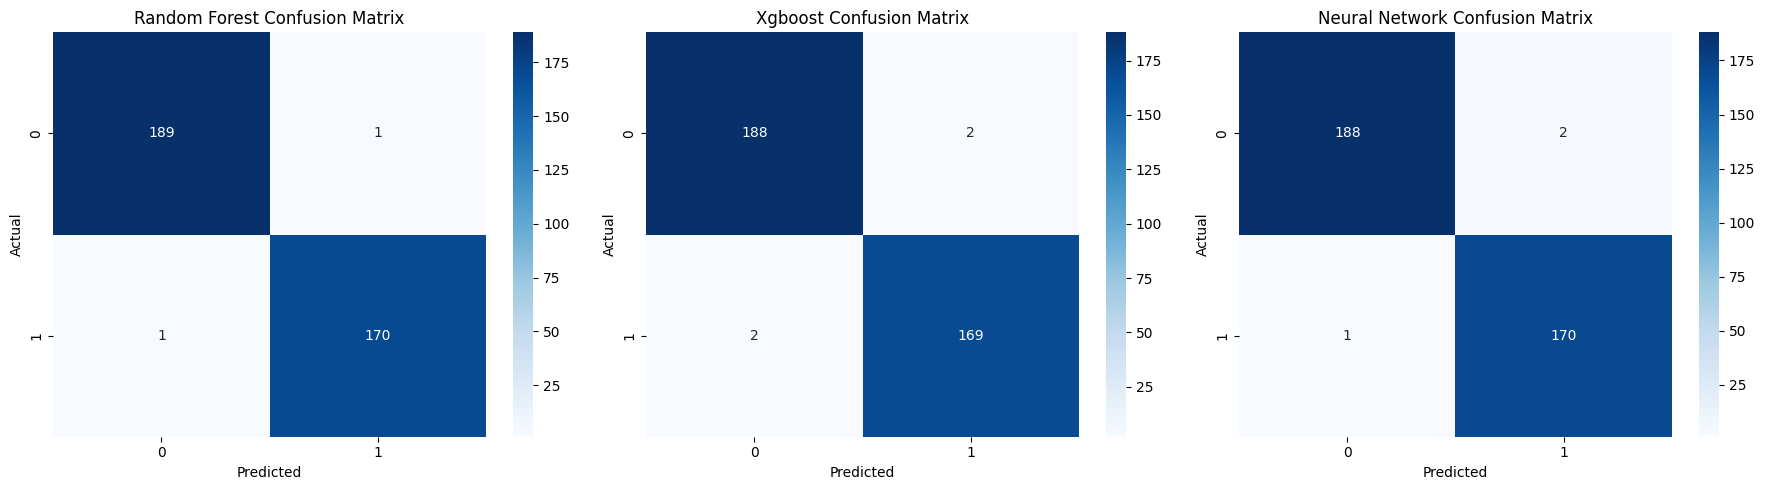

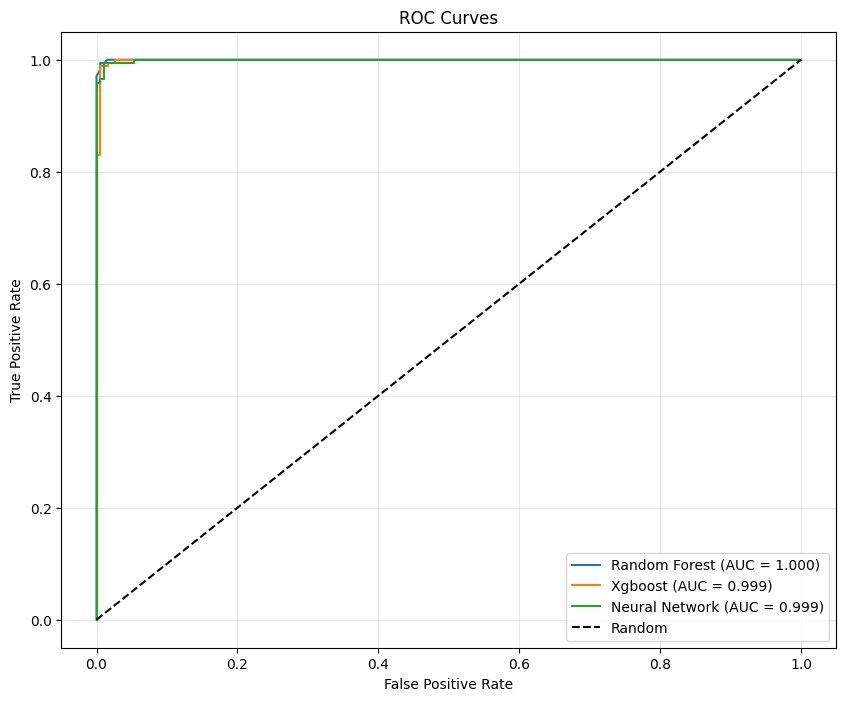

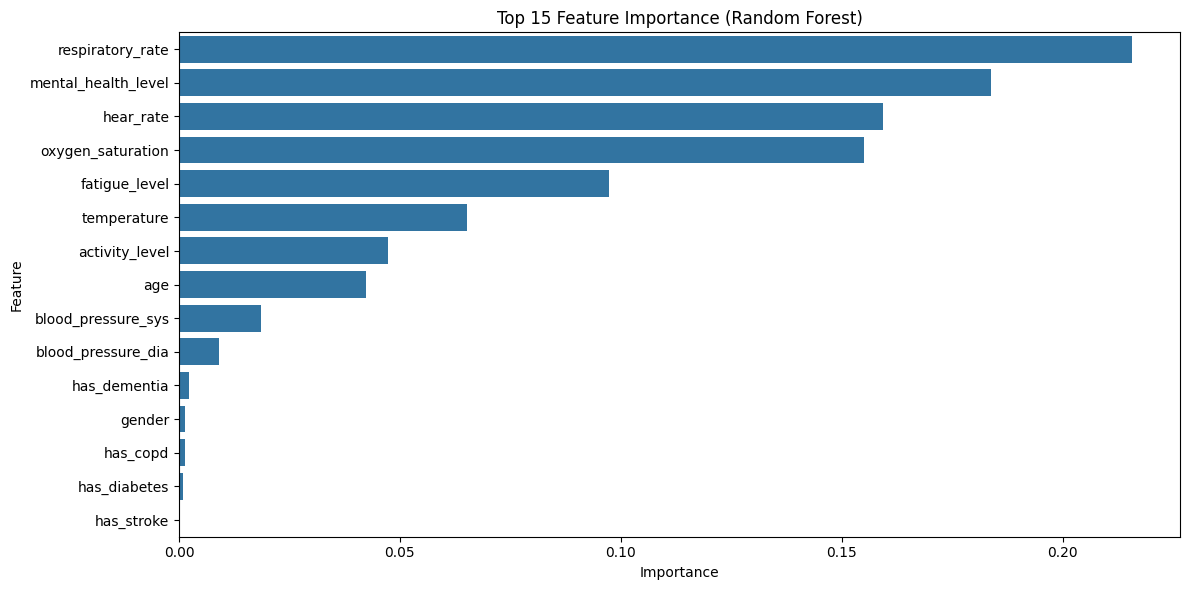

In [69]:
# Evaluate model performance
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Load model results
with open('models/model_results.pkl', 'rb') as f:
    model_results = pickle.load(f)

# Create a function to evaluate and display results
def evaluate_model(model_name, y_true, y_pred, y_proba=None):
    """Evaluate model performance with multiple metrics"""
    results = {}
    results['accuracy'] = accuracy_score(y_true, y_pred)
    results['precision'] = precision_score(y_true, y_pred, zero_division=0)
    results['recall'] = recall_score(y_true, y_pred, zero_division=0)
    results['f1'] = f1_score(y_true, y_pred, zero_division=0)
    
    if y_proba is not None:
        results['auc'] = roc_auc_score(y_true, y_proba)
    
    return results

# Evaluate all models
evaluation_results = {}
models = ['random_forest', 'xgboost', 'neural_network']

for model in models:
    test_preds = model_results[model]['test_preds']
    test_proba = model_results[model]['test_proba']
    evaluation_results[model] = evaluate_model(model, y_test, test_preds, test_proba)

# Convert results to DataFrame for easier comparison
results_df = pd.DataFrame(evaluation_results).T
display(results_df.style.highlight_max(axis=0))

# Plotting confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, model in enumerate(models):
    cm = confusion_matrix(y_test, model_results[model]['test_preds'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{model.replace("_", " ").title()} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))

for model in models:
    y_proba = model_results[model]['test_proba']
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{model.replace("_", " ").title()} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Feature importance for Random Forest model (optional)
if 'random_forest' in model_results:
    # Load the Random Forest model
    with open('models/random_forest_model.pkl', 'rb') as f:
        rf_model = pickle.load(f)
    
    # Get feature importance
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    
    # Plot top 15 features
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
    plt.title('Top 15 Feature Importance (Random Forest)')
    plt.tight_layout()
    plt.show()

,accuracy,precision,recall,f1,auc
random_forest,0.994460,0.994152,0.994152,0.994152,0.999831
xgboost,0.988920,0.988304,0.988304,0.988304,0.998923
neural_network,0.991690,0.988372,0.994152,0.991254,0.999354
ft_transformer,0.988920,0.982659,0.994152,0.988372,0.999908


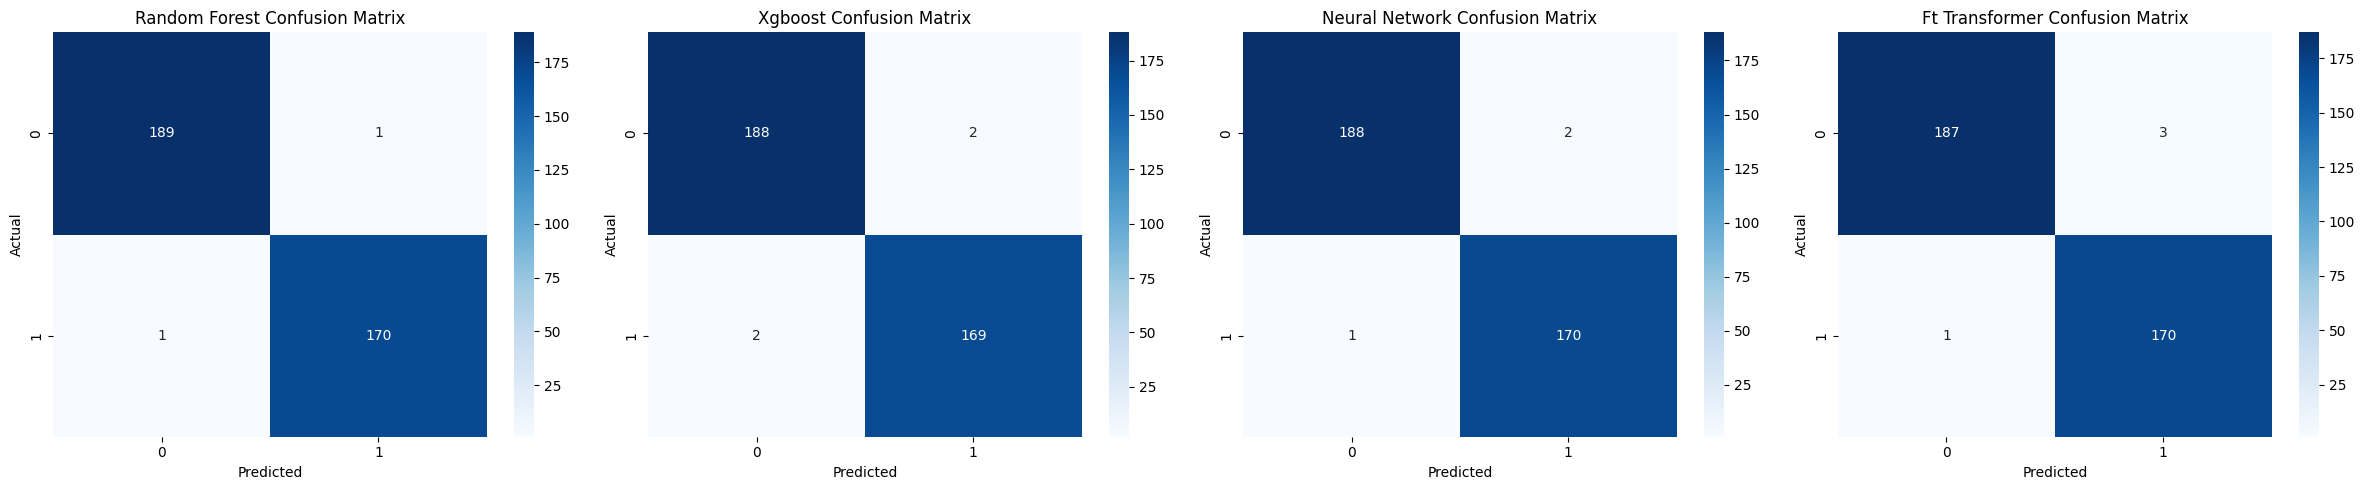

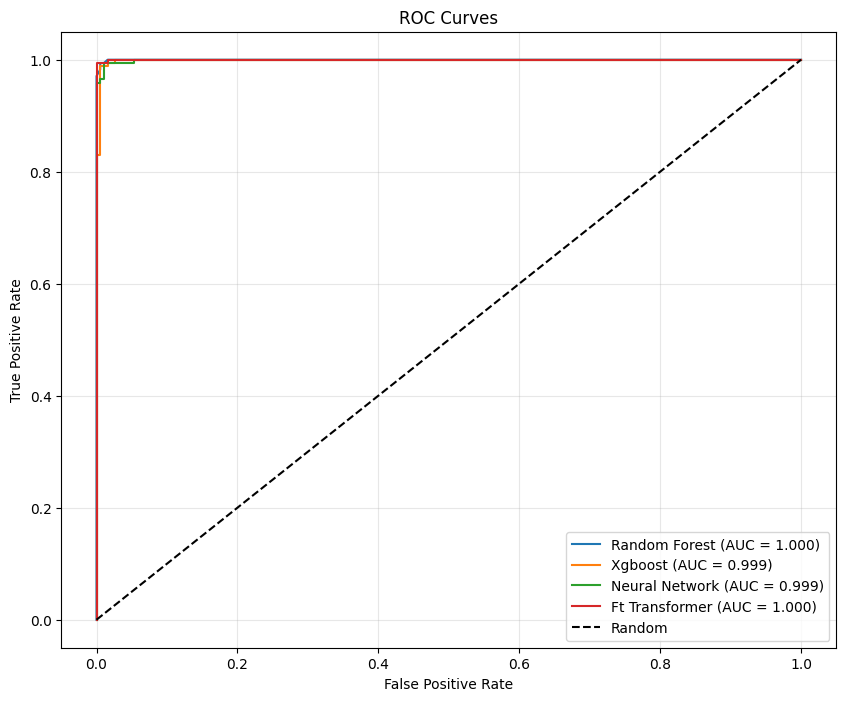

In [70]:
# Update the models list to include the FT Transformer
models = ['random_forest', 'xgboost', 'neural_network', 'ft_transformer']

# Recalculate evaluation results for all models including FT Transformer
evaluation_results = {}

for model in models:
    test_preds = model_results[model]['test_preds']
    test_proba = model_results[model]['test_proba']
    evaluation_results[model] = evaluate_model(model, y_test, test_preds, test_proba)

# Convert results to DataFrame for easier comparison
results_df = pd.DataFrame(evaluation_results).T
display(results_df.style.highlight_max(axis=0))

# Redraw confusion matrices with FT Transformer
fig, axes = plt.subplots(1, 4, figsize=(24, 5))

for i, model in enumerate(models):
    cm = confusion_matrix(y_test, model_results[model]['test_preds'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{model.replace("_", " ").title()} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Redraw ROC curves including FT Transformer
plt.figure(figsize=(10, 8))

for model in models:
    y_proba = model_results[model]['test_proba']
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{model.replace("_", " ").title()} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()